# Earth's radiation budget

... work in progress

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

## Earth's Radiation Budget

:::{figure-md} markdown-fig
<img src="../images/stephens2012.png" alt="Earth's Energy Balance" class="bg-primary mb-1" width="800px">

The global annual mean energy budget of Earth for the approximate period 2000–2010. All fluxes are in W m$^{–2}$. Solar fluxes are in yellow and infrared fluxes in pink. The four flux quantities in purple-shaded boxes represent the principal components of the atmospheric energy balance. Source: {cite:t}`Stephens:2012a`
:::

## Incoming solar radiation

Computing the incident sunlight hitting the Earth is a geometrical problem with a known solution so long as we know the details of the Earth's orbit. For details, see [this lecture in Brian Rose's *The Climate Laboratory*](https://brian-rose.github.io/ClimateLaboratoryBook/courseware/insolation.html#)

In [55]:
fsize = (10,6)

In [25]:
import climlab

lat = np.linspace( -90., 90., 500)
days = np.linspace(0, climlab.utils.constants.days_per_year, 365 )
Q = climlab.solar.insolation.daily_insolation( lat, days )

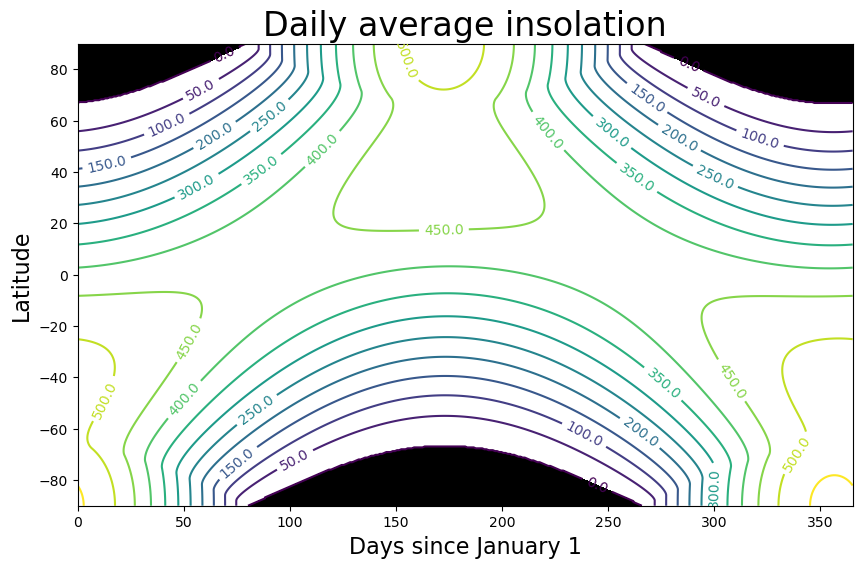

In [56]:
fig, ax = plt.subplots(figsize=fsize)
CS = ax.contour( days, lat, Q , levels = np.arange(0., 600., 50.) )
ax.clabel(CS, CS.levels, inline=True, fmt='%r', fontsize=10)
ax.set_xlabel('Days since January 1', fontsize=16 )
ax.set_ylabel('Latitude', fontsize=16 )
ax.set_title('Daily average insolation', fontsize=24 )
ax.contourf ( days, lat, Q, levels=[-1000., 0.], colors='k' );

## CERES EBAF data

The CERES-EBAF product is described by {cite:t}`Kato:2018a`.

In [2]:
ceres = xr.open_dataset('../data/CERES_EBAF.nc')
ceres

<xarray.Dataset>
Dimensions:             (lat: 180, ctime: 12, sc1: 12, sc2: 2)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * ctime               (ctime) int32 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: sc1, sc2
Data variables:
    climatology_bounds  (sc1, sc2) int32 ...
    ztoa_sw_all_clim    (ctime, lat) float32 ...
    ztoa_lw_all_clim    (ctime, lat) float32 ...
    ztoa_net_all_clim   (ctime, lat) float32 ...
    zsolar_clim         (ctime, lat) float32 ...
Attributes:
    title:        CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Monthly...
    institution:  NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:  CF-1.4
    comment:      Climatology from 07/2005 to 06/2015
    version:      Edition 4.1; Release Date May 28, 2019
    DOI:          10.5067/TERRA-AQUA/CERES/EBAF-TOA_L3B004.1

### The monthly mean insolation as represented in CERES data

In [3]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

<a list of 32 text.Text objects>

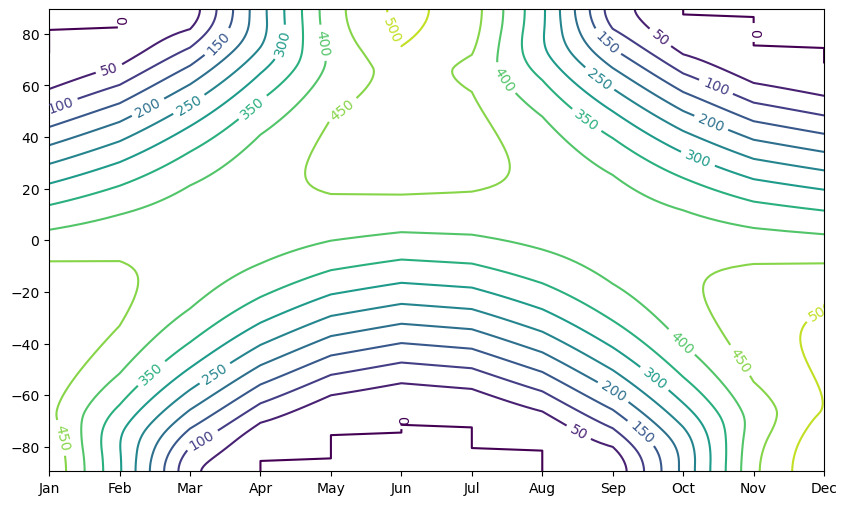

In [57]:
fig, ax = plt.subplots(figsize=fsize)
levels = np.arange(0., 600., 50.)
CS = ax.contour(months, ceres.lat, ceres.zsolar_clim.transpose(), levels=levels)
ax.clabel(CS, CS.levels, inline=True, fontsize=10)

In [93]:
def annual_line_plot(da, title=''):
    '''A little helper function to make some nice line plots of annual means compared to January and July'''
    fig = plt.figure(figsize=fsize)
    da.mean(dim='ctime').plot(label='Annual', linewidth=3)
    for month_index in [0,6]:
        da.isel(ctime=month_index).plot(label=months[month_index])
    plt.legend()
    plt.xlim([-90,90])
    plt.grid()
    plt.title(title, fontsize=18);

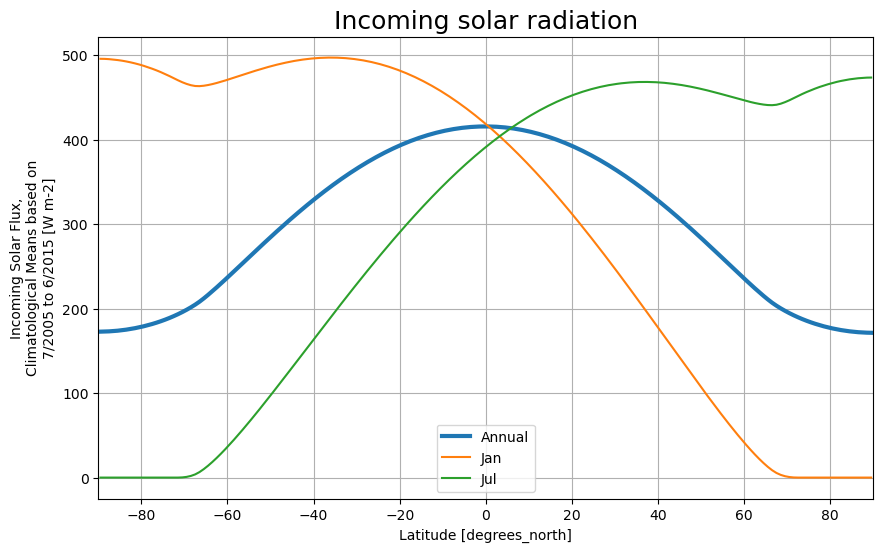

In [94]:
annual_line_plot(ceres.zsolar_clim, title='Incoming solar radiation')

### Albedo

The ratio of outgoing to incoming SW radiation:

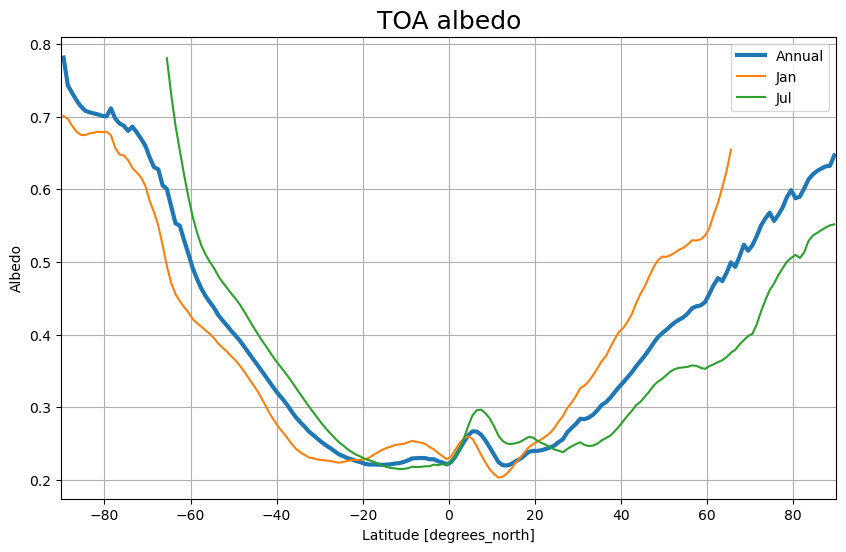

In [95]:
# masking out points where the insolation is near zero
albedo = ceres.ztoa_sw_all_clim / ceres.zsolar_clim.where(ceres.zsolar_clim > 10.)  

annual_line_plot(albedo, title='TOA albedo')
plt.ylabel('Albedo');

### Absorbed shortwave radiation

The residual between what comes in and what goes out:

Text(0, 0.5, 'flux (W m$^{-2}$)')

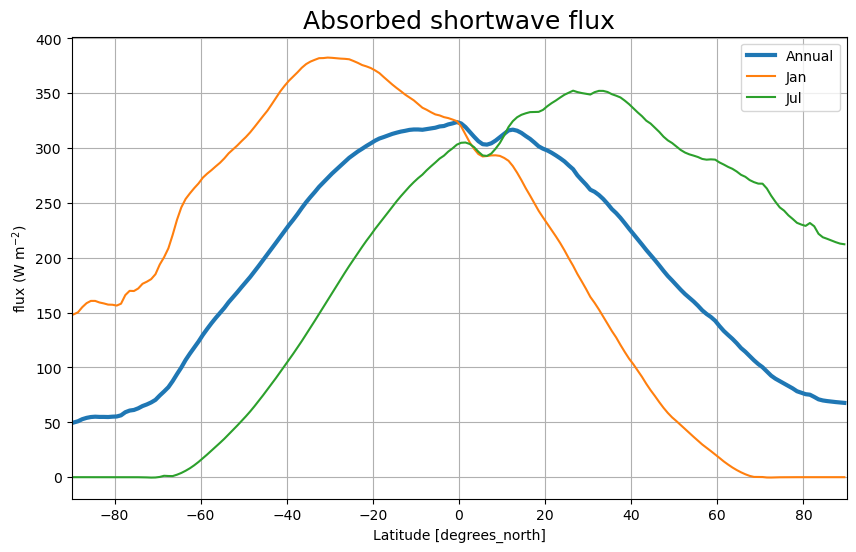

In [96]:
absorbedSW = ceres.zsolar_clim - ceres.ztoa_sw_all_clim

annual_line_plot(absorbedSW, title='Absorbed shortwave flux')
plt.ylabel('flux (W m$^{-2}$)')

### Outgoing longwave radiation

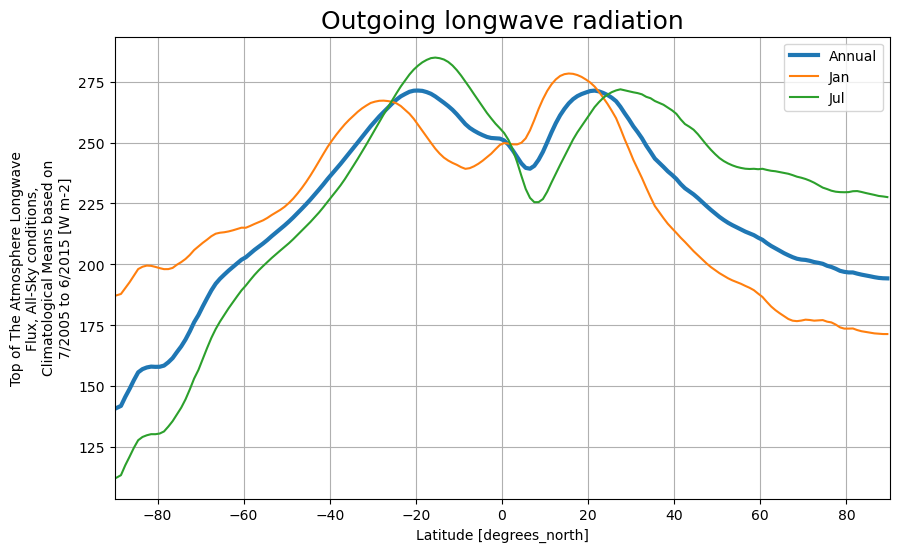

In [97]:
annual_line_plot(ceres.ztoa_lw_all_clim, title='Outgoing longwave radiation')

### Net radiation at TOA

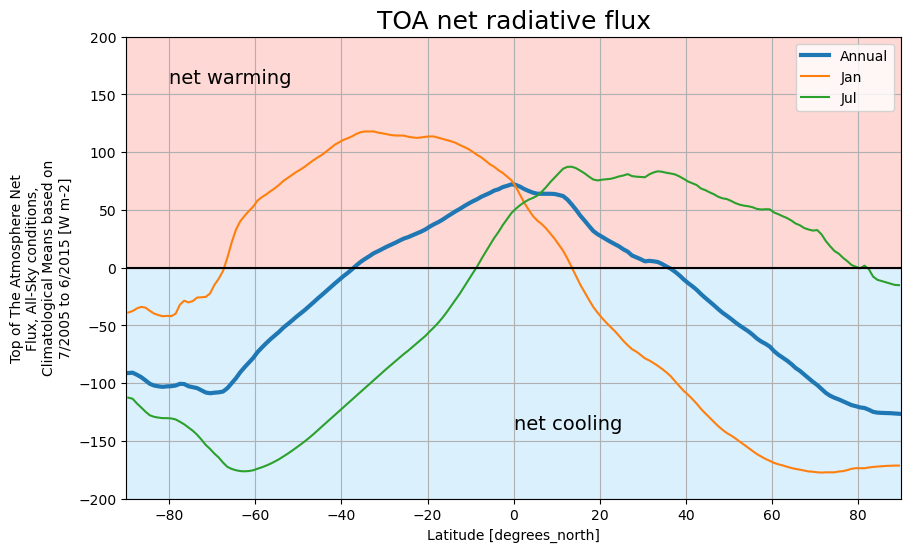

In [121]:
annual_line_plot(ceres.ztoa_net_all_clim, title='TOA net radiative flux')
ylim = [-200, 200]
plt.plot([-90,90], [0,0], color='black')
plt.fill_between([-90,90], [ylim[0], ylim[0]], alpha=0.3, color='lightskyblue')
plt.text(-80, 160, 'net warming', fontsize=14)
plt.fill_between([-90,90], [ylim[1], ylim[1]], alpha=0.3, color='salmon')
plt.text(0, -140, 'net cooling', fontsize=14)
plt.ylim(ylim);